# **Práctica 3 - Computación Evolutiva**

#### **APROXIMACIÓN DE UNA FUNCIÓN DESCONOCIDA**

**Alumnos**
- María Sauras 
- Marina Pérez



---



---


# **PASO 1:** Análisis gráfico

---

##### *Aproximación a la ecuación mediante la graficación de los datos*

El primer paso antes de comenzar cualquier procedimiento o metodología es analizar el problema junto con los recursos dados. En este caso, se paso a observar que tendencia siguen los valores dados en una representación gráfica de **Y** a lo largo de **X**.



In [ ]:
!pip install sympy
!pip install seaborn

In [ ]:
#-----------------------
# Librerias necesarias
#-----------------------
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
import seaborn as sb
import random 

In [ ]:
data = pd.read_csv('unknown_function.csv')
data.head(2)

,id,x,y
0,1933,1934,295
1,6486,6487,841


#### PRIMER ESTUDIO: Dataset inicial 

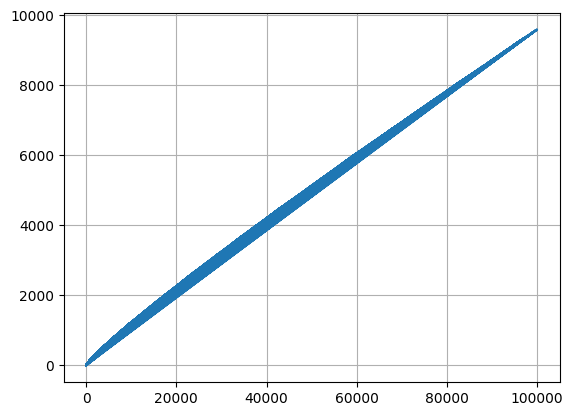

In [ ]:
df = data
x = df['x']
y = df['y']
plt.plot(x, y)
plt.yscale('linear')
plt.grid(True)
plt.rcParams["figure.figsize"] = (40,20)

Diferentes graficas

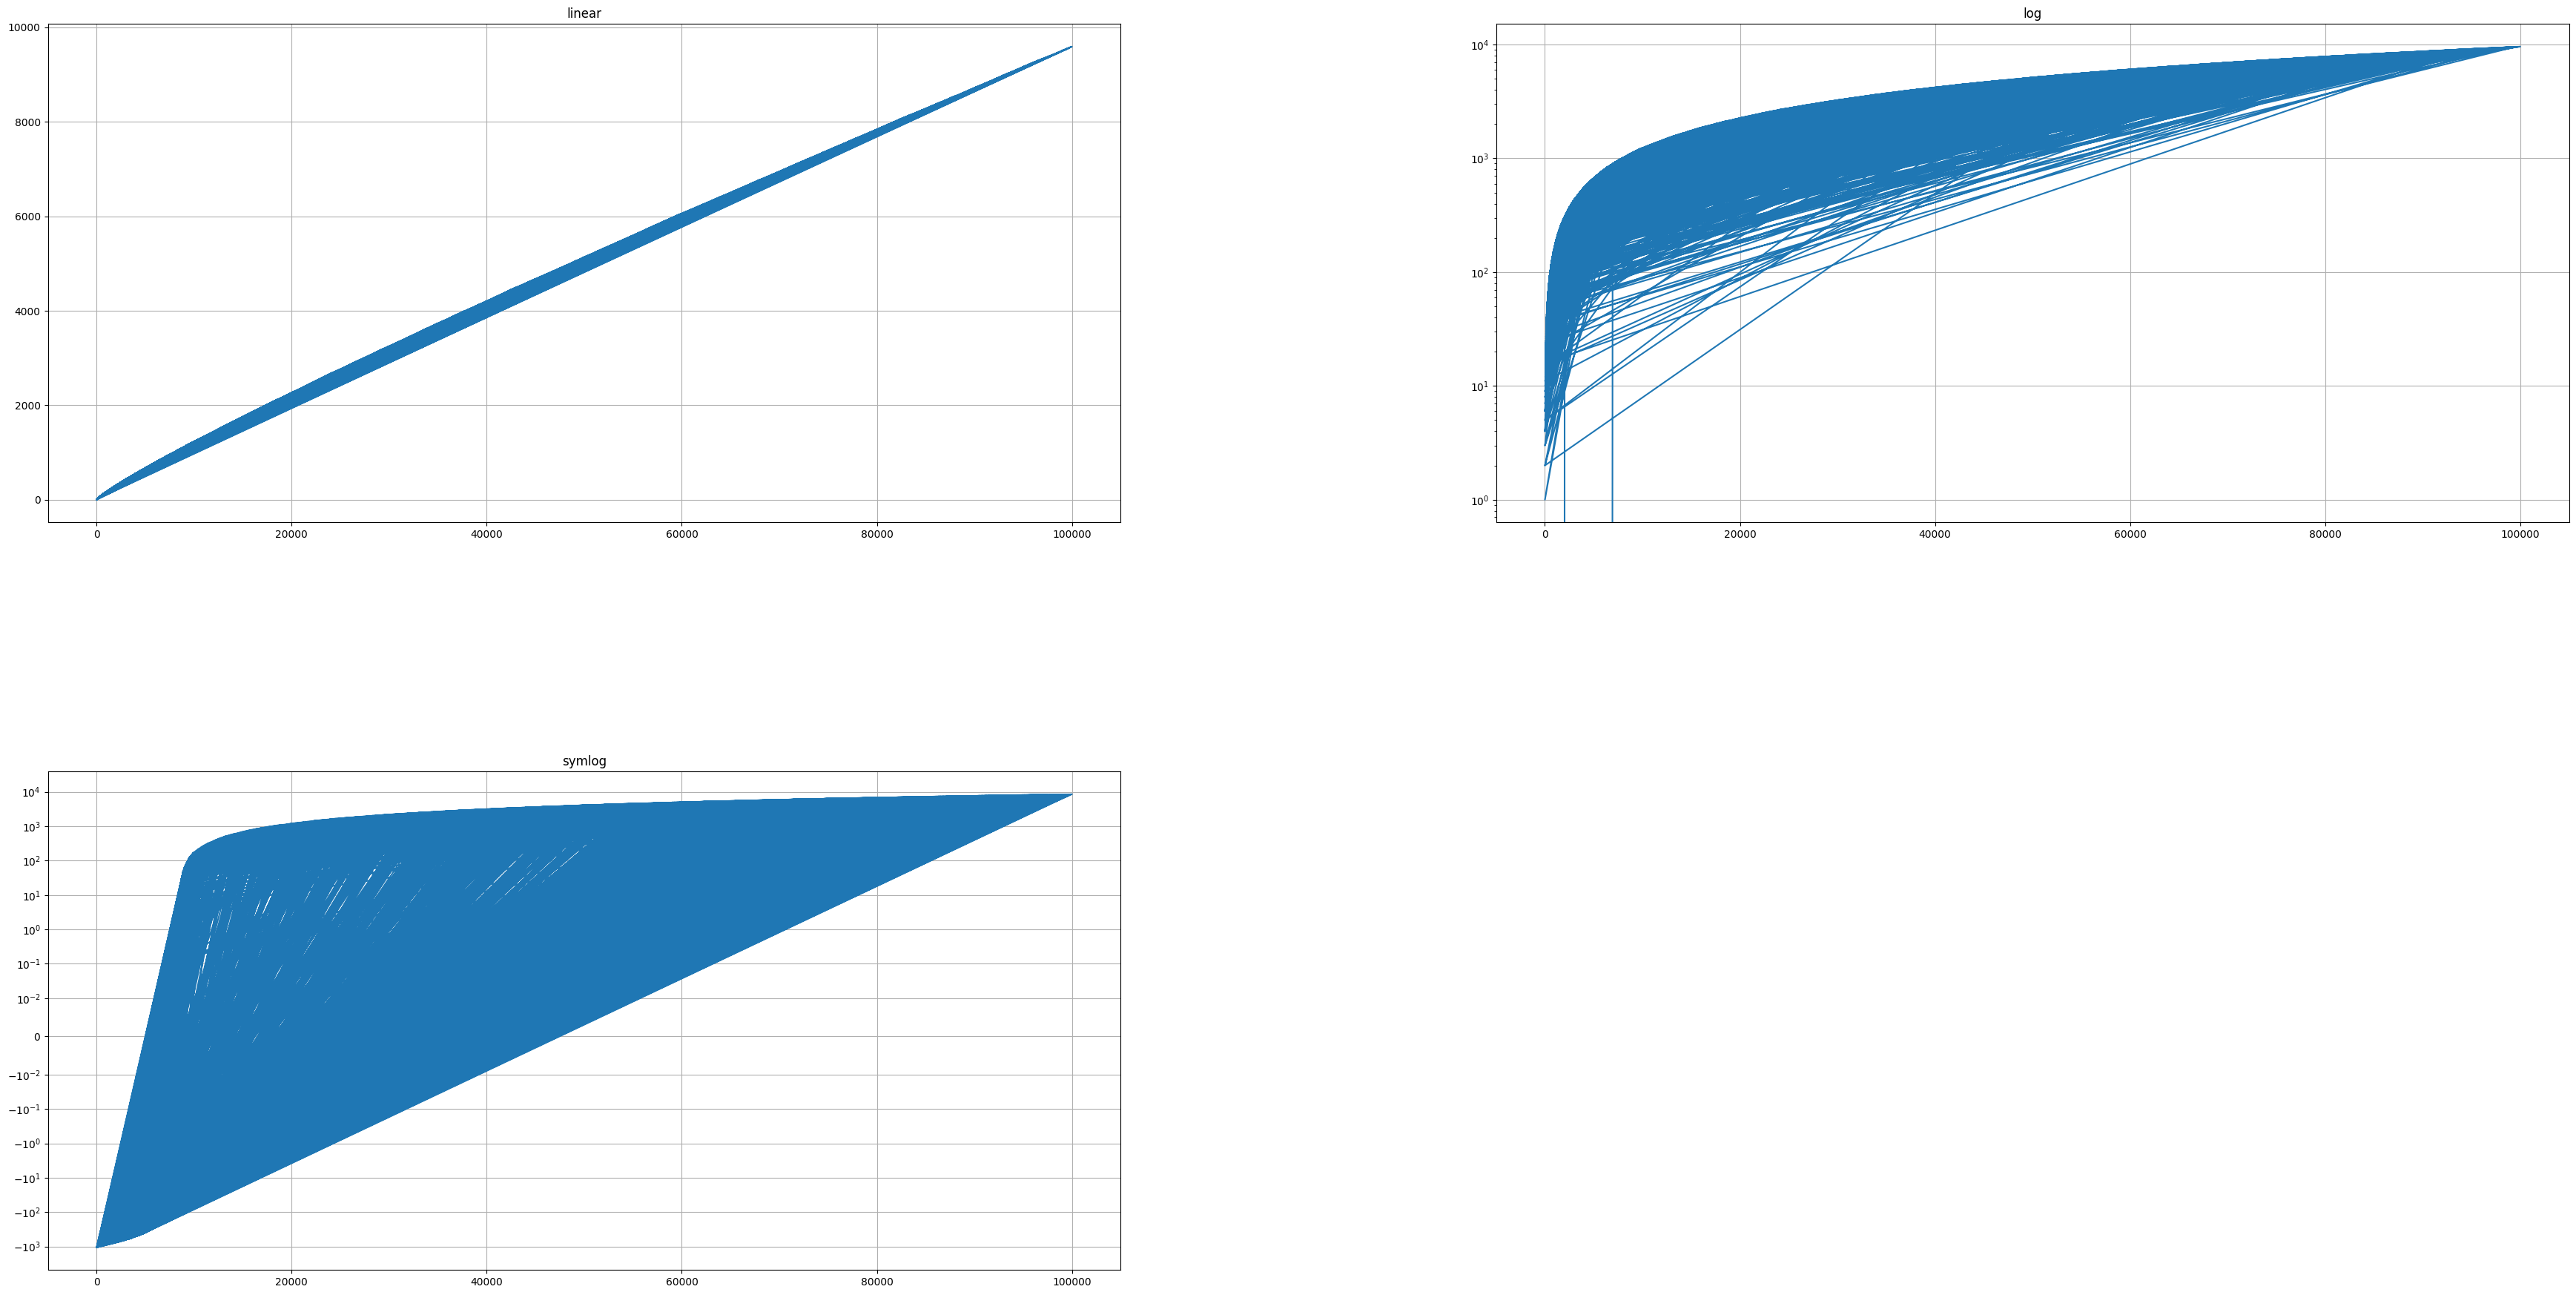

In [ ]:
# plot with various axes scales
plt.figure()

# linear
plt.subplot(221)
plt.plot(x, y)
plt.yscale('linear')
plt.title('linear')
plt.grid(True)

# log
plt.subplot(222)
plt.plot(x, y)
plt.yscale('log')
plt.title('log')
plt.grid(True)

# symmetric log
plt.subplot(223)
plt.plot(x, y - y.mean())
plt.yscale('symlog', linthresh=0.01)
plt.title('symlog')
plt.grid(True)
# Adjust the subplot layout, because the logit one may take more space
# than usual, due to y-tick labels like "1 - 10^{-3}"
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.5,
                    wspace=0.35)


Se procedió a ver la correlacion de los datos con la representacion lineal, logarítmica, logarítmica simétrica. Con lo que se pudo concluir que los datos no guardaban ninguna relacion de este tipo.


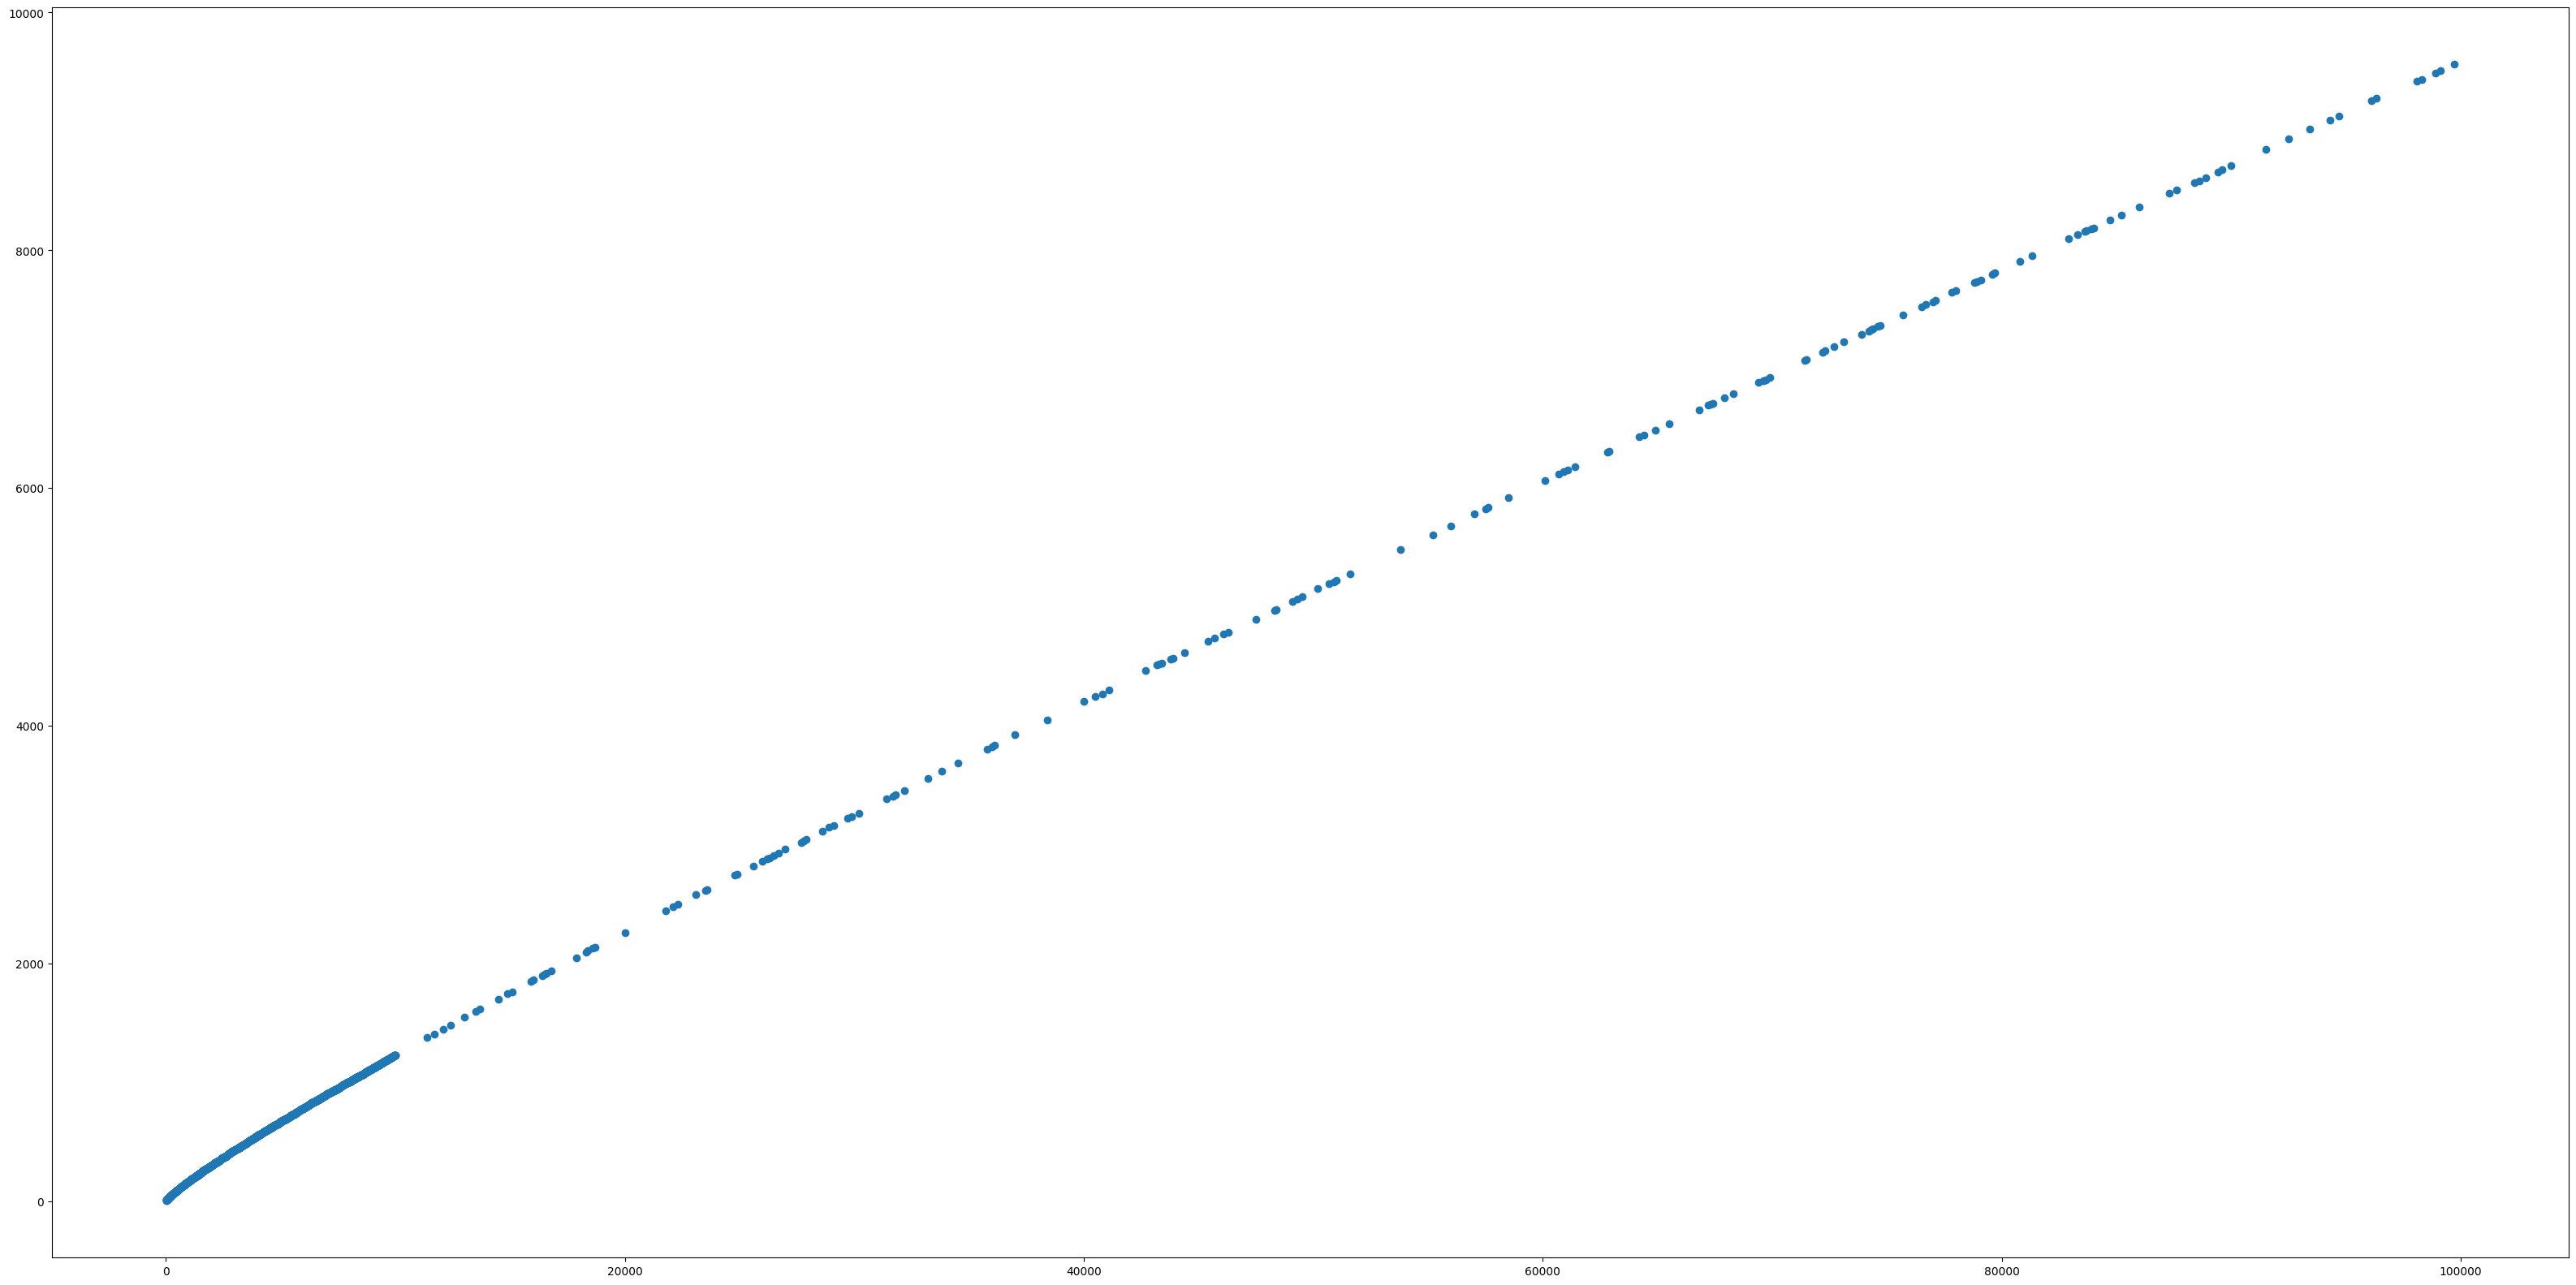

In [ ]:
plt.scatter(x.head(2000), y.head(2000))
plt.show()

Seguidamente, se procedió a hacer un *scatter plot* donde se puede apreciar punto por punto del conjunto de datos como guardan relación entre las variables **X** e **Y**. En este gráfico se presumía la posibilidad de guardar una linearidad entre los datos pero se puede observar una pequeña area curvilinea iniciando el plot. 

In [ ]:

class Data_analytics():
  def __init__(self, df):
    self.df = df

  ## información estadística básica de nuestro set de datos.
  def std(self):
    print('==========')
    print('Statistics') 
    print('==========')
    print(self.df.describe())

  def correlation(self):
    print('===========')
    print('Correlation') 
    print('===========')
    print(self.df.corr())

In [ ]:
da = Data_analytics(df)
da.std()

Statistics
                 id              x             y
count  10900.000000   10900.000000  10900.000000
mean    5449.500000    9133.027523   1058.854312
std     3146.703301   15910.861505   1546.108705
min        0.000000       1.000000      0.000000
25%     2724.750000    2725.750000    397.000000
50%     5449.500000    5450.500000    721.000000
75%     8174.250000    8175.250000   1026.000000
max    10899.000000  100000.000000   9592.000000


In [ ]:
da.correlation()

Correlation
          id         x         y
id  1.000000  0.576588  0.612015
x   0.576588  1.000000  0.998861
y   0.612015  0.998861  1.000000


#### SEGUNDO ESTUDIO: Dataset final con Longs

In [ ]:
data2 = pd.read_csv('unknown_function_long2.csv')
data2.head(2)

,id,x,y
0,0,544490,44912
1,1,685587,55477


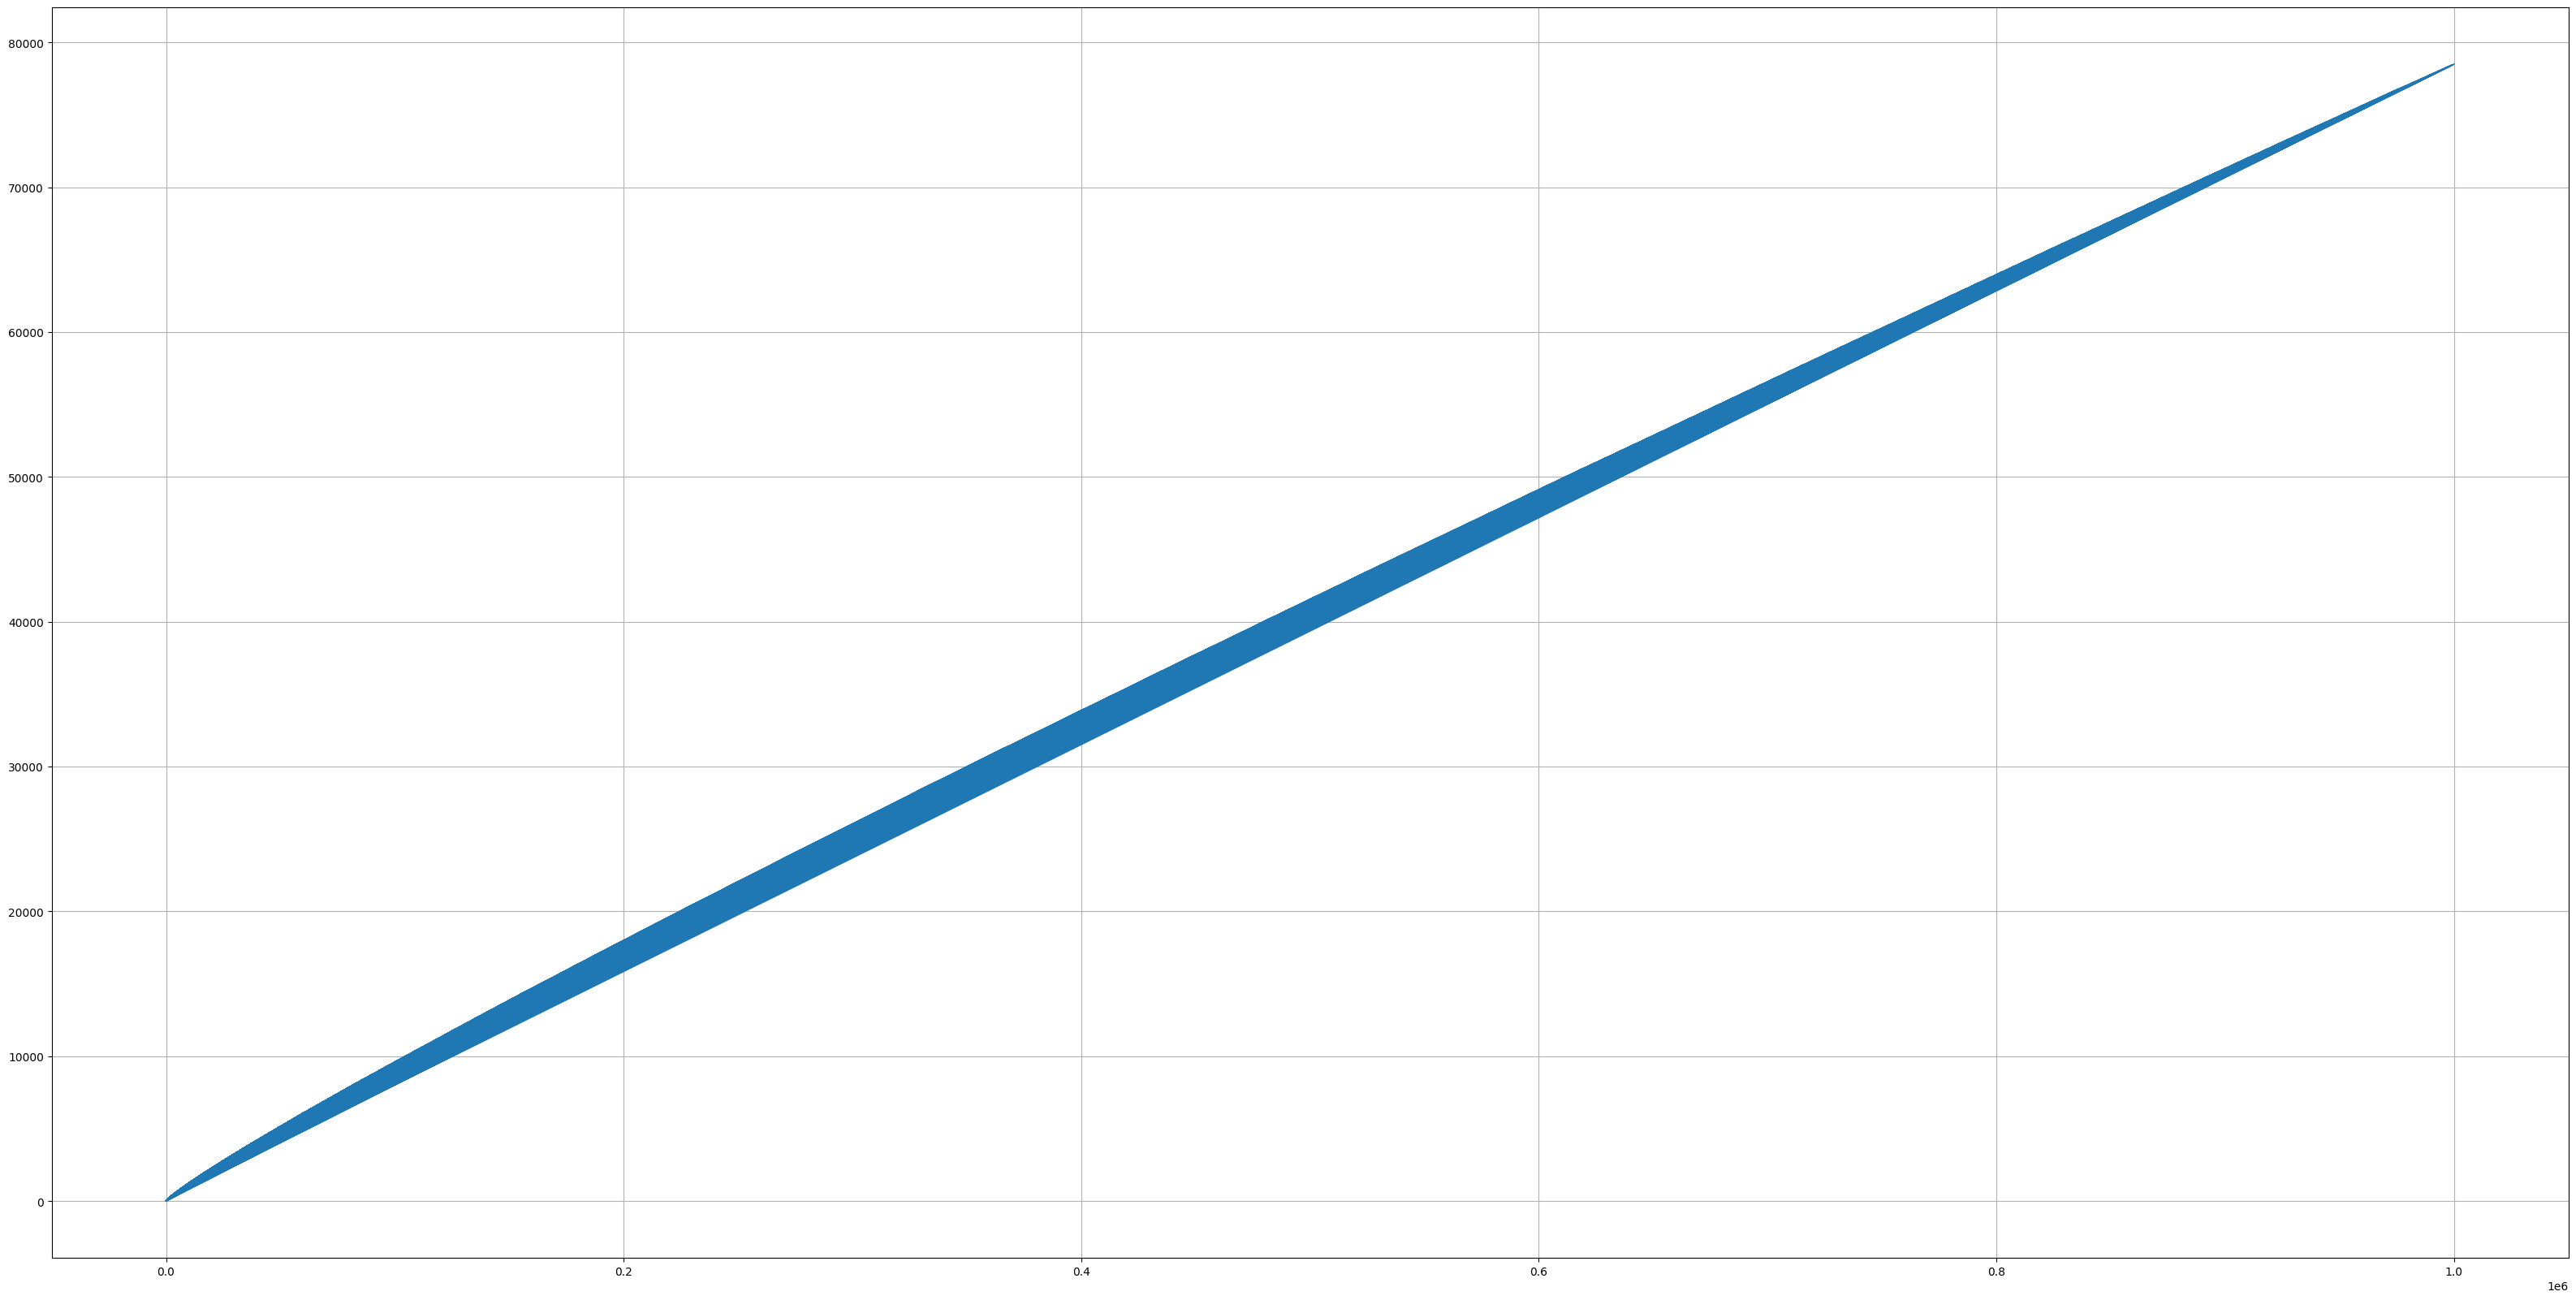

In [ ]:
df = data2
x = df['x']
y = df['y']
plt.plot(x, y)
plt.yscale('linear')
plt.grid(True)
plt.rcParams["figure.figsize"] = (40,20)

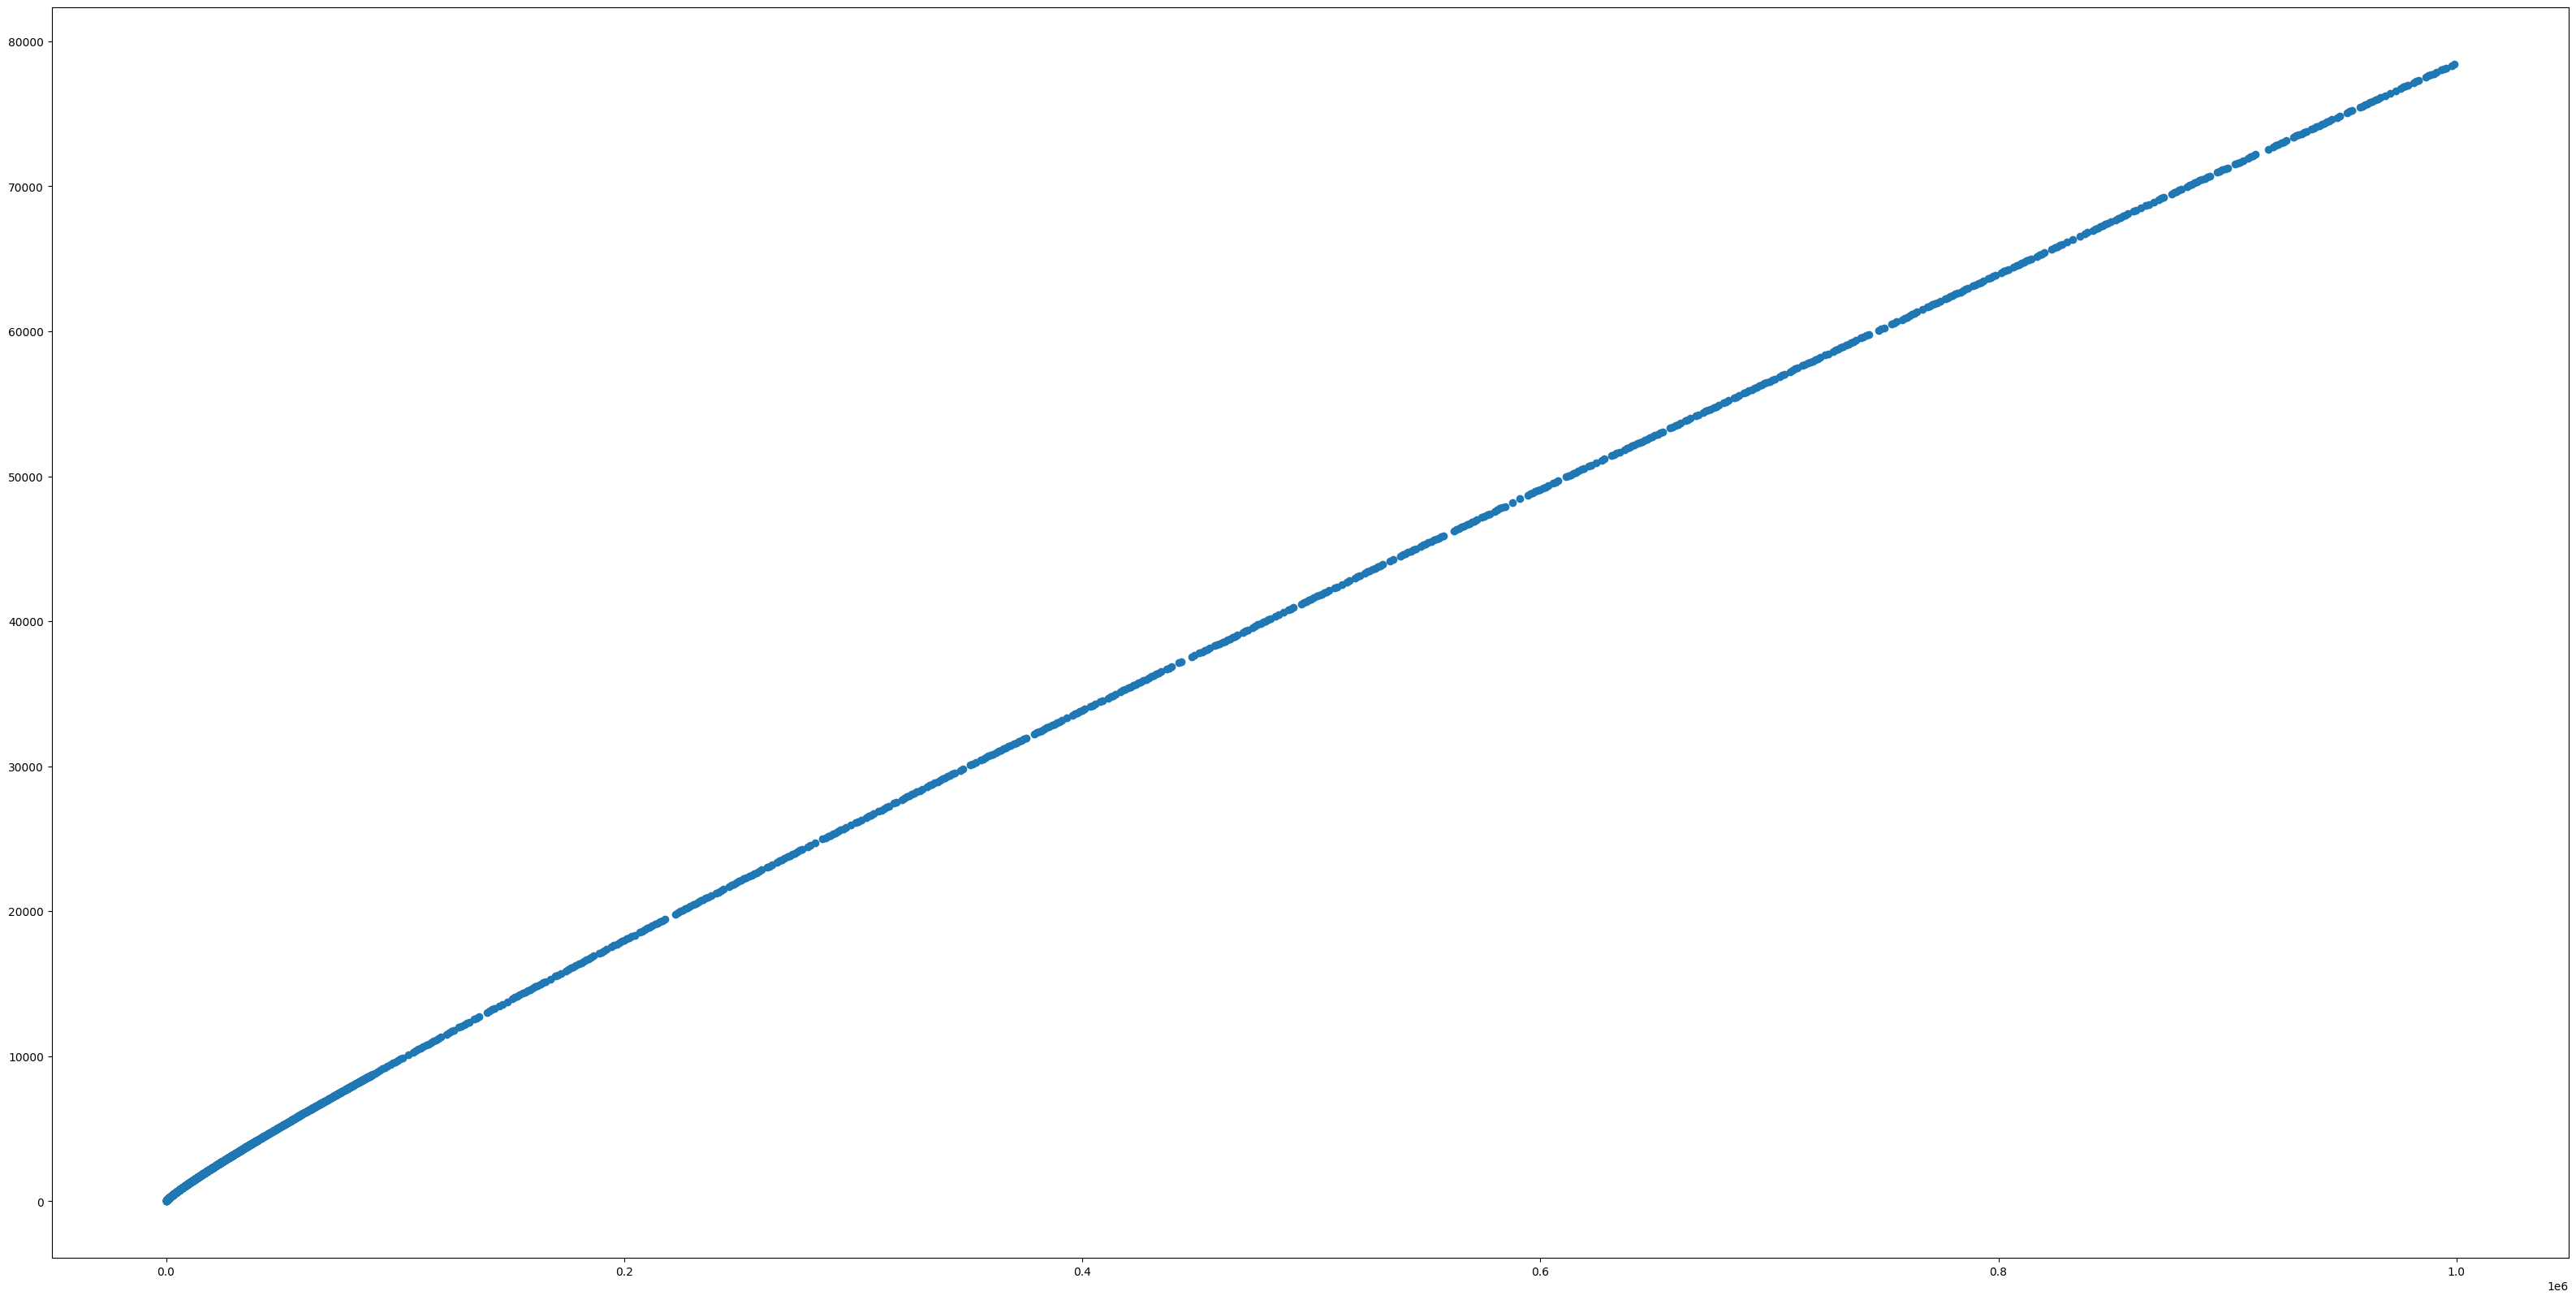

In [ ]:
plt.scatter(x.head(2000), y.head(2000))
plt.show()

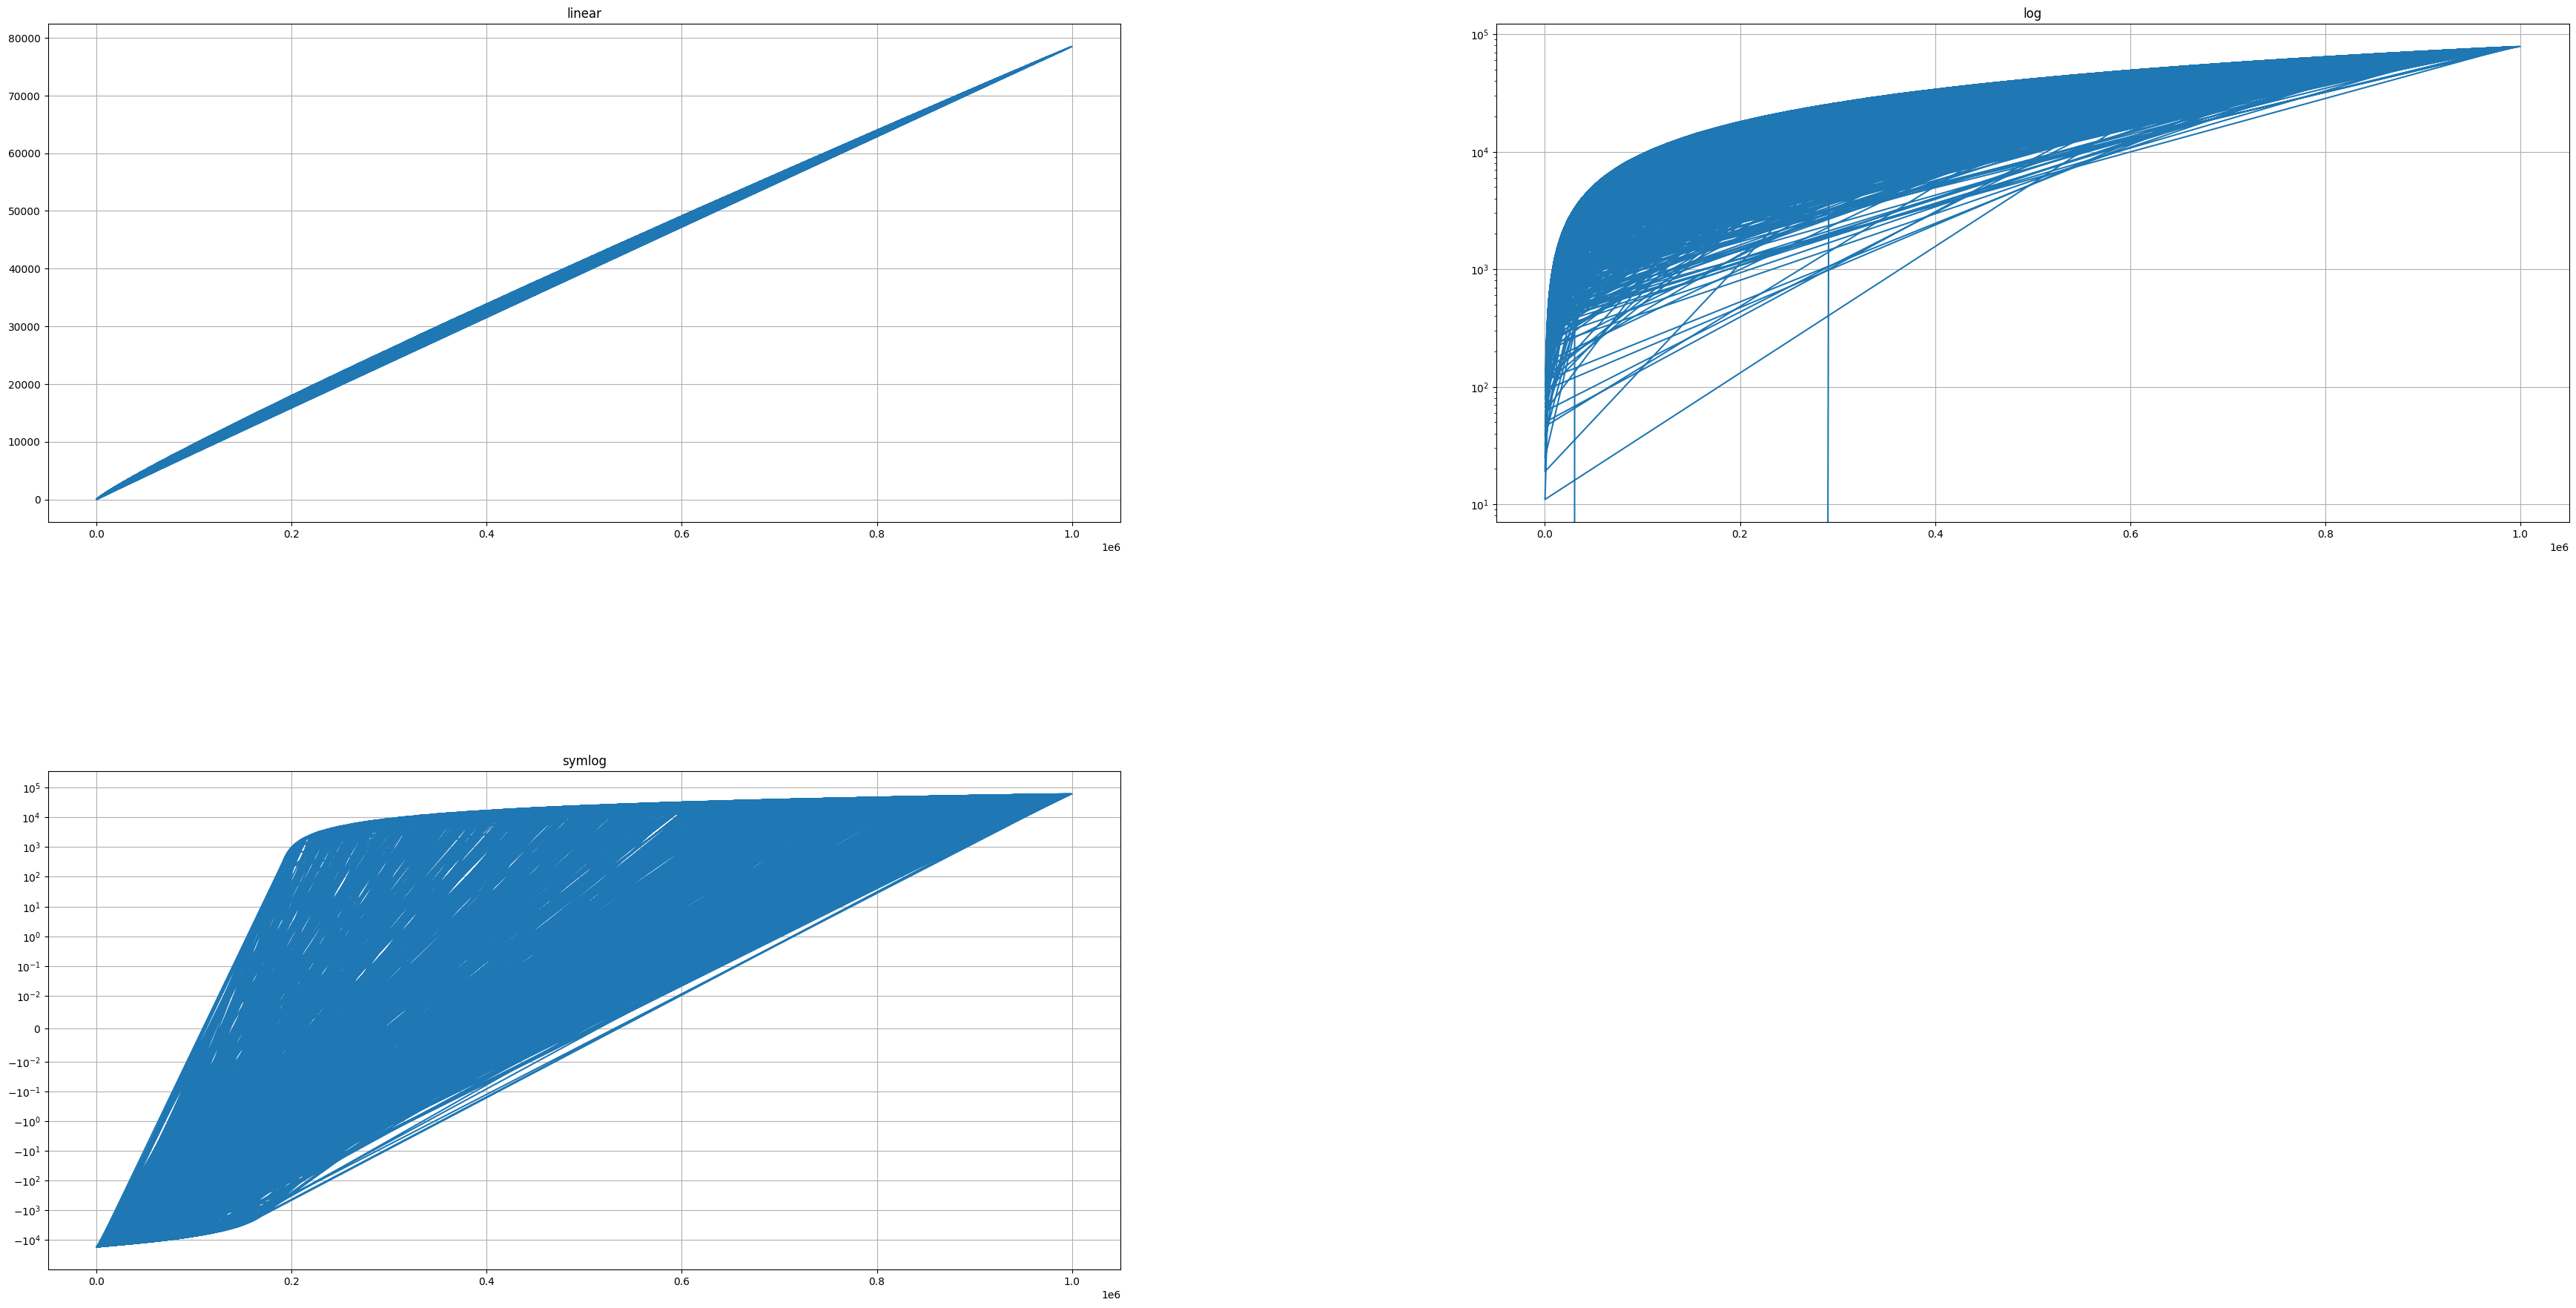

In [ ]:
# plot with various axes scales
plt.figure()

# linear
plt.subplot(221)
plt.plot(x, y)
plt.yscale('linear')
plt.title('linear')
plt.grid(True)

# log
plt.subplot(222)
plt.plot(x, y)
plt.yscale('log')
plt.title('log')
plt.grid(True)

# symmetric log
plt.subplot(223)
plt.plot(x, y - y.mean())
plt.yscale('symlog', linthresh=0.01)
plt.title('symlog')
plt.grid(True)
# Adjust the subplot layout, because the logit one may take more space
# than usual, due to y-tick labels like "1 - 10^{-3}"
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.5,
                    wspace=0.35)

In [ ]:
da = Data_analytics(df)
da.std()

Statistics
                id               x             y
count  2484.000000     2484.000000   2484.000000
mean   1241.500000   201494.908213  16968.669485
std     717.213357   285303.200873  22607.081184
min       0.000000        1.000000      0.000000
25%     620.750000    20485.750000   2312.250000
50%    1241.500000    43193.500000   4510.000000
75%    1862.250000   310346.750000  26826.500000
max    2483.000000  1000000.000000  78498.000000


In [ ]:
da.correlation()

Correlation
          id         x         y
id  1.000000  0.032500  0.032333
x   0.032500  1.000000  0.999586
y   0.032333  0.999586  1.000000


#### Conclusiones Análisis:

*Nota: el estudio se realiza tanto para el dataset principal, como para el segundo con un volumen de datos mayores*

**Análisis Gráficas:**

    En primera instancia se identifica en la gráfica una tendencia liniear, por lo que principalmente se puede pensar que en los datos se está buscando una ecuación linear, como por ejemplo la ecuación de la recta. 

    Aunque, después se realizaron más estudios en los que se ven que esto no es del todo cierto, puesto que en la gráfica se puede observar que esta podria asemejarse a la gráfica de una raíz cuadrada.

    Aunque, todo esto, se verá en la implementación del algoritmo genético.

    Finalmente comentar que la tendencia de las gráficas del primer dataset no cambian para el segundo, aunque con el segundo si que se observan aquellos datos faltantes, es decir, menor dispersión. Seguramente por la naturaleza de los mismos.

**Análisis estadísticos:**

    Mediante el análisis estadístico observamos como se componían los datos para obtener medias, desviaciones y valores máximos y mínimos. Estos datos nos ayudaron, además, a guiarnos a la elección de los operandos guíandonos con otras estadisticas obtenidas de otros datos para poder aproximarnos a los operandos adecuados para el estudio.

    Con la correlación, conseguimos saber la gran dependencia que existe entre la X y la Y por lo que en la programación genética se eliminará la columna id puesto que son datos poco relevantes.
    




---
---


# **Paso 2:** Programación Genética


---


La programación genética es una técnica que permite crear algoritmos que pueden programarse simulando la evolución darwiniana. En lugar de programar un modelo que pueda resolver un problema concreto, la programación genética sólo proporciona un objetivo general y deja que el modelo permita descubrir por su cuenta cuales son los detalles necesarios para adaptarse a una solución para el problema. 


Pasos:

1. Definición de las variables globales.
2. Definición de las funciones para el estudio de los árboles.
3. Definición de la clase que crea y trata los árboles.
4. Definición de las funciones: 
  - Inicializar población
  - Cálculo de la fitness
  - Tratamiento de la población.
5. Programación genética.

In [ ]:
# Librerias necesarias

from random import random, randint, seed
from statistics import mean
from copy import deepcopy
import numpy as np
import pandas as pd

In [ ]:
# Variables globales --> Alguno de estos valores se irán optimizando.

N               = 60     # Tamaño de la Poblacion
DEPTH_MIN       = 2      # Valor minimo de profundidad del arbol
DEPTH_MAX       = 5      # Valor máximo de profundidad del arbol
GENERACION      = 200    # Máximas generaciones que estudiar
TORNEO          = 5      # Torneo entre 5 individuos de la población ==>   Valor que puede optimizarse
PROB_CRUCE      = 0.817  # Probabilidad de cruce                     ==>   Valor que puede optimizarse 
PROB_MUTACION   = 0.2    # Valor para la mutación                    ==>   Valor que puede optimizarse 
dt              = pd.read_csv('unknown_function.csv')
dt2             = pd.read_csv('unknown_function_long2.csv')

In [ ]:
#================================================#
#     Definimos las funciones que trataremos     #     
# en los árboles para la búsqueda de la función  #
#================================================#
def add(x, y): return x + y
def sub(x, y): return x - y
def mul(x, y): return x * y
def log(x, y): return np.log(x+y)
def sqt(x, y): return np.sqrt(x+y)
def div(x, y): 
    try:
        z = x / y
    except ZeroDivisionError:
        z = 0
    return z

#===========================================================#
#               Definición del array de:
#  1. Funciones: Se encuentran en los nodos de los árboles
#  2. Terminales: Se encuentra en las hojas final del árbol
#===========================================================#
FUNCION = [add, sub, mul, div, log, sqt]
TERMINAL = ['x',1,2,3,4,5,6,7,8,9]

Clase **Generar_Arbol**:

En esta definimos las características de los árboles como son los datos que tienen, sus raices izquierdas y derechas. Además de definir funciones para generar las etiquetas que se visualizan en los nodos, como la visualización,analisis y creación de árboles donde se le agregan subarboles, pueden mutar y cruzarse entre ellos.

In [ ]:
class Generar_Arbol:
    def __init__(self, data = None, izq = None, der = None):
        self.data  = data
        self.izq  = izq
        self.der = der

    #=======================================================#
    #           Función para ponerle etiqueta de            #
    #.               funciones en cada nodo                 #
    #=======================================================#        
    def nodo(self): #etiqueta que lleva
        if (self.data in FUNCION):
            return self.data.__name__
        else: 
            return str(self.data)


    #======================================================#
    #           Función para crear los árboles             #
    #------------------------------------------------------#  
    # Existen diferentes métodos:                          #
    #   - Grow                                             #
    #   - Full                                             #
    #------------------------------------------------------#  
    #   Parámetros:                                        #
    #   - Máxima profundidad                               #
    #======================================================#
    def crear_arbol(self, grow, max_depth, depth = 0): 
        if depth < DEPTH_MIN or (depth < max_depth and not grow): 
            self.data = FUNCION[randint(0, len(FUNCION)-1)]
        elif depth >= max_depth:   
            self.data = TERMINAL[randint(0, len(TERMINAL)-1)]
        else: # Usamos el método grow
            if random () > 0.5: 
                self.data = TERMINAL[randint(0, len(TERMINAL)-1)]
            else:
                self.data = FUNCION[randint(0, len(FUNCION)-1)]
        
        if self.data in FUNCION:
            self.izq = Generar_Arbol()          
            self.izq.crear_arbol(grow, max_depth, depth = depth + 1)            
            self.der = Generar_Arbol()
            self.der.crear_arbol(grow, max_depth, depth = depth + 1)

    #=======================================================#
    #           Función para printear el árbol              #
    #=======================================================#
    def mostrar_arbol(self, p = ""):
        print("%s%s" % (p, self.nodo()))        
        if self.izq:  self.izq.mostrar_arbol (p + "   ")
        if self.der: self.der.mostrar_arbol(p + "   ")


    #======================================================#
    #       Función para el cálculo de la funciones        #
    #       que se crean con el arbol.                     #
    #       Esta nos devolverá un valor                    #
    #       que trataremos como ypred.                     #         
    #------------------------------------------------------#
    # Parámetros:                                          #
    #       X --> Valor de X del csv dado                  #
    # Return:                                              #
    #       ypred --> Valor predecido                      #
    #======================================================#
    def calcular_arbol(self, x): 
        if (self.data in FUNCION): 
            return self.data(self.izq.calcular_arbol(x), self.der.calcular_arbol(x))
        elif self.data == 'x': return x
        else: return self.data


    #=======================================================#
    #    Funcion que scanea los arboles para permitir       #
    #                  el cruce entre arbol                 #
    #=======================================================#
    def scan_arbol(self, count, otro):
        count[0] -= 1            
        if count[0] <= 1: 
            if not otro: # return subtree rooted here
                return self.sub_arbol()
            else: # glue subtree here
                self.data  = otro.data
                self.izq  = otro.izq
                self.der = otro.der
        else:  
            ret = None              
            if self.izq  and count[0] > 1: ret = self.izq.scan_arbol(count, otro)  
            if self.der and count[0] > 1: ret = self.der.scan_arbol(count, otro)  
            return ret
    #=======================================================#
    #           Función para crear subarboles.              #
    #=======================================================#
    def sub_arbol(self): 
        t = Generar_Arbol()
        t.data = self.data
        if self.izq:  t.izq  = self.izq.sub_arbol()
        if self.der: t.der = self.der.sub_arbol()
        return t

    #=======================================================#
    #       Función que verifica el tamaño que tienen       #
    #=======================================================#
    def dimension(self): 
        if self.data in TERMINAL: return 1
        l = self.izq.dimension()  if self.izq  else 0
        r = self.der.dimension() if self.der else 0
        return 1 + l + r


    #======================================================#
    #                 Función Mutación:                    #
    #------------------------------------------------------#
    #   Función que muta con una probabilidad muy baja     #
    #   un nodo del árbol.                                 #
    #======================================================#
    def mutacion(self):
        if random() < PROB_MUTACION: # Mutaremos en el nodo que se escoge random.
            self.crear_arbol(grow = True, max_depth = 2)
        elif self.izq: self.izq.mutacion()
        elif self.der: self.der.mutacion() 
                        
    #===============================================================#
    #                           Crossover                           #
    #===============================================================#
    # Como los individuos son un arbol lo que se hará será escoger  #
    # un nodo del arbol al azar y se intercambian los subarboles    #
    #===============================================================#
    def cruce(self, otro): # xo 2 trees at random nodes
        if random() < PROB_CRUCE:
            otro = otro.scan_arbol([randint(1, otro.dimension())], None) # 2nd random subtree
            self.scan_arbol([randint(1, self.dimension())], otro) # 2nd subtree "glued" inside 1st tree
# end class GPTree

In [ ]:
###############################################################
# Creación de la poblacion con todos los individuos (arboles) #
#teniendo con capacidad de crecer y el otro con el metodo full#
###############################################################
def poblacion():
    seed()
    individuos = []
    for i in range(3, DEPTH_MAX + 1):
        for i in range(int(N/6)):
            arbol = Generar_Arbol()
            arbol.crear_arbol(grow = True, max_depth = i) # Método Grow
            individuos.append(arbol)  
        for i in range(int(N/6)):
            arbol = Generar_Arbol()
            arbol.crear_arbol(grow = False, max_depth = i) # Método Full
            individuos.append(arbol) 
    return individuos

In [ ]:
###############################################################
# Para el cálculo de la fitness lo que haremos será hacer uso #
# del error medio absolto: abs(ypred-yreal)                   #
###############################################################
def calculo_fit(individual, dataset): # inverse mean absolute error over dataset normalized to [0,1]
    f=[]
    for i in range(len(dataset)):
        f.append(abs(individual.calcular_arbol(dataset['x'][i]) - dataset['y'][i]))   
    return mean(f)        

In [ ]:
###############################################################
# Seleccionamos un individuo mediante la selección del torneo #
#-------------------------------------------------------------# 
# Parámetros:                                                 #
#   Population ---> Árboles.                                  # 
#   Fitness    ---> Fitness del árbol.                        #
#                                                             #
# Devuelve:                                                   #
#   El arbol con mejor fitness en cada ronda del torneo.      #
###############################################################
def seleccion(ind, fit): 
    torneo = [randint(0, len(ind)-1) for i in range(TORNEO)]
    ganadores = [fit[torneo[i]] for i in range(TORNEO)]
    return deepcopy(ind[torneo[ganadores.index(min(ganadores))]]) 

/var/folders/z8/52zfs8h97qj1h6xxcnn1r3mh0000gn/T/ipykernel_2972/1931535884.py:8: RuntimeWarning: invalid value encountered in log
  def log(x, y): return np.log(x+y)
/var/folders/z8/52zfs8h97qj1h6xxcnn1r3mh0000gn/T/ipykernel_2972/1931535884.py:9: RuntimeWarning: invalid value encountered in sqrt
  def sqt(x, y): return np.sqrt(x+y)
/var/folders/z8/52zfs8h97qj1h6xxcnn1r3mh0000gn/T/ipykernel_2972/1931535884.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  z = x / y


Bienvenid@ - Implementación de la Técnica de Programación Genética!
________________________
gen: 1 , mejor_fitness: 14255.979 , mejor_individuo:
div
   div
      x
      sqt
         4
         add
            div
               6
               2
            log
               3
               1
   mul
      mul
         5
         2
      log
         8
         5


/var/folders/z8/52zfs8h97qj1h6xxcnn1r3mh0000gn/T/ipykernel_2972/1931535884.py:8: RuntimeWarning: divide by zero encountered in log
  def log(x, y): return np.log(x+y)


________________________
gen: 2 , mejor_fitness: 11543.289 , mejor_individuo:
div
   div
      x
      sqt
         4
         add
            div
               6
               2
            log
               3
               1
   mul
      5
      log
         8
         5
________________________
gen: 3 , mejor_fitness: 10818.245 , mejor_individuo:
mul
   div
      div
         x
         6
      div
         7
         3
   log
      add
         6
         9
      sub
         5
         log
            sqt
               x
               4
            x
________________________
gen: 4 , mejor_fitness: 1108.504 , mejor_individuo:
div
   div
      x
      sqt
         4
         add
            div
               6
               2
            log
               3
               1
   add
      div
         6
         2
      log
         3
         1
________________________
gen: 12 , mejor_fitness: 1044.793 , mejor_individuo:
div
   div
      sub
         div
            2
     

/var/folders/z8/52zfs8h97qj1h6xxcnn1r3mh0000gn/T/ipykernel_2972/1931535884.py:12: RuntimeWarning: divide by zero encountered in long_scalars
  z = x / y


________________________
gen: 46 , mejor_fitness: 894.379 , mejor_individuo:
div
   div
      x
      7
   log
      log
         log
            7
            log
               6
               5
         log
            4
            sqt
               sub
                  sqt
                     2
                     6
                  log
                     7
                     2
               add
                  6
                  sqt
                     mul
                        7
                        add
                           3
                           div
                              sqt
                                 sub
                                    log
                                       2
                                       2
                                    log
                                       3
                                       2
                                 2
                              3
                     x

/var/folders/z8/52zfs8h97qj1h6xxcnn1r3mh0000gn/T/ipykernel_2972/1931535884.py:12: RuntimeWarning: divide by zero encountered in divide
  z = x / y


________________________
gen: 170 , mejor_fitness: 25.019 , mejor_individuo:
div
   div
      sub
         mul
            mul
               8
               7
            sqt
               7
               4
         sub
            3
            x
      log
         sqt
            x
            log
               7
               2
         5
   log
      log
         log
            log
               7
               sub
                  x
                  6
            log
               sqt
                  6
                  x
               5
         log
            div
               div
                  log
                     div
                        div
                           x
                           div
                              x
                              7
                        log
                           log
                              log
                                 log
                                    7
                     

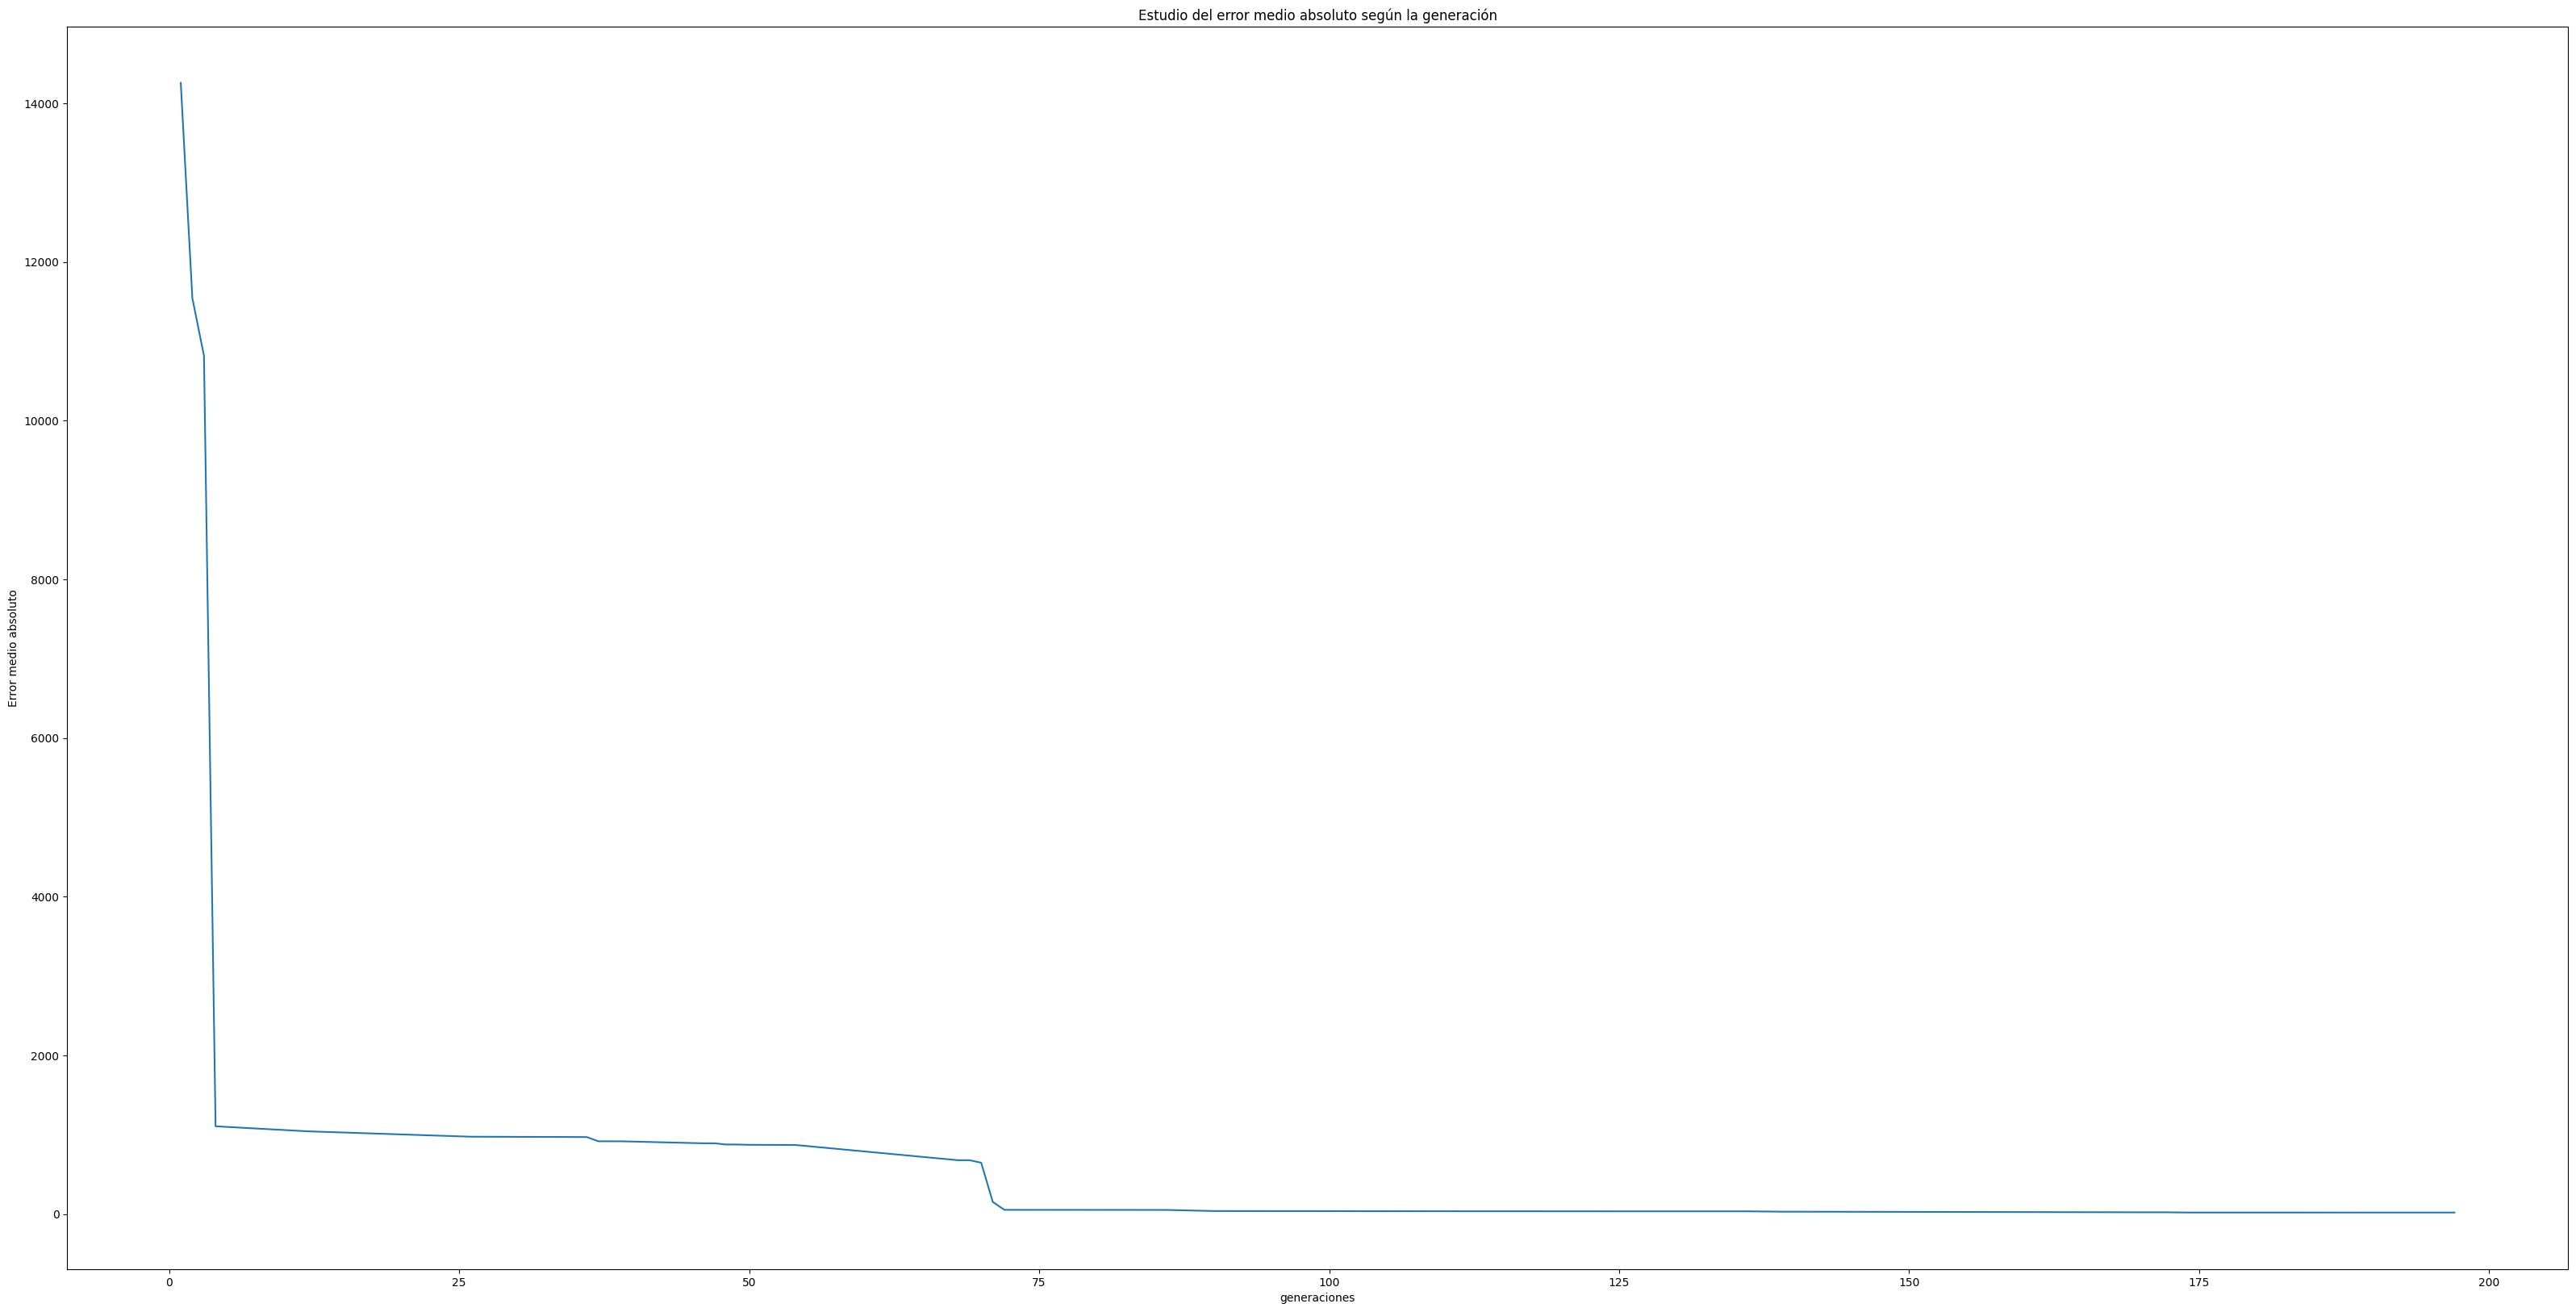

In [ ]:
def main():      
   
    dataset=dt2
    dataset=dataset.drop(['id'],axis=1)
     
    individuos      = poblacion()           # Población.
    mejor_individuo = None                  
    mejor_fitness   = 100000                # Número mágico para la inicialización. 
    mejor_gen       = 0
    fits            = [calculo_fit(individuos[i], dataset) for i in range(N)]
    mejores_fits    = []
    g               = []
    fit             = 0

    print('Bienvenid@ - Implementación de la Técnica de Programación Genética!')
    
    for gen in range(GENERACION):        
        descendencia=[]

        for i in range(N):
            indiv1 = seleccion(individuos, fits)
            indiv2 = seleccion(individuos, fits)
            indiv1.cruce(indiv2)
            indiv1.mutacion()
            descendencia.append(indiv1)
        individuos=descendencia
        fits = [calculo_fit(individuos[i], dataset) for i in range(N)]

        if min(fits) == 'nan': fits.dropna()
        
        if min(fits) < mejor_fitness:

            mejor_fitness = min(fits)
            mejor_gen = gen
            mejor_individuo = deepcopy(individuos[fits.index(min(fits))])
            fit = round(min(fits),3)
            print("________________________")
            print("gen:", gen, ", mejor_fitness:", fit, ", mejor_individuo:") 
            mejor_individuo.mostrar_arbol()
            mejores_fits.append(fit)
            g.append(mejor_gen)

        if mejor_fitness == 0: break   
    print("----------------------------------------------------------------")
    print("END OF RUN. El mejor individuo ha sido en la generacion:  " + str(mejor_gen) +\
          "con fitness = " + str(round(mejor_fitness,3)))
    mejor_individuo.mostrar_arbol()
    plt.plot(g , mejores_fits)
    plt.title("Estudio del error medio absoluto según la generación")
    plt.xlabel('generaciones')
    plt.ylabel('Error medio absoluto')
    plt.show()
    
if __name__== "__main__":
  main()

**Figura 1.** Gráfica de la mejor fitness para el dataset de longs

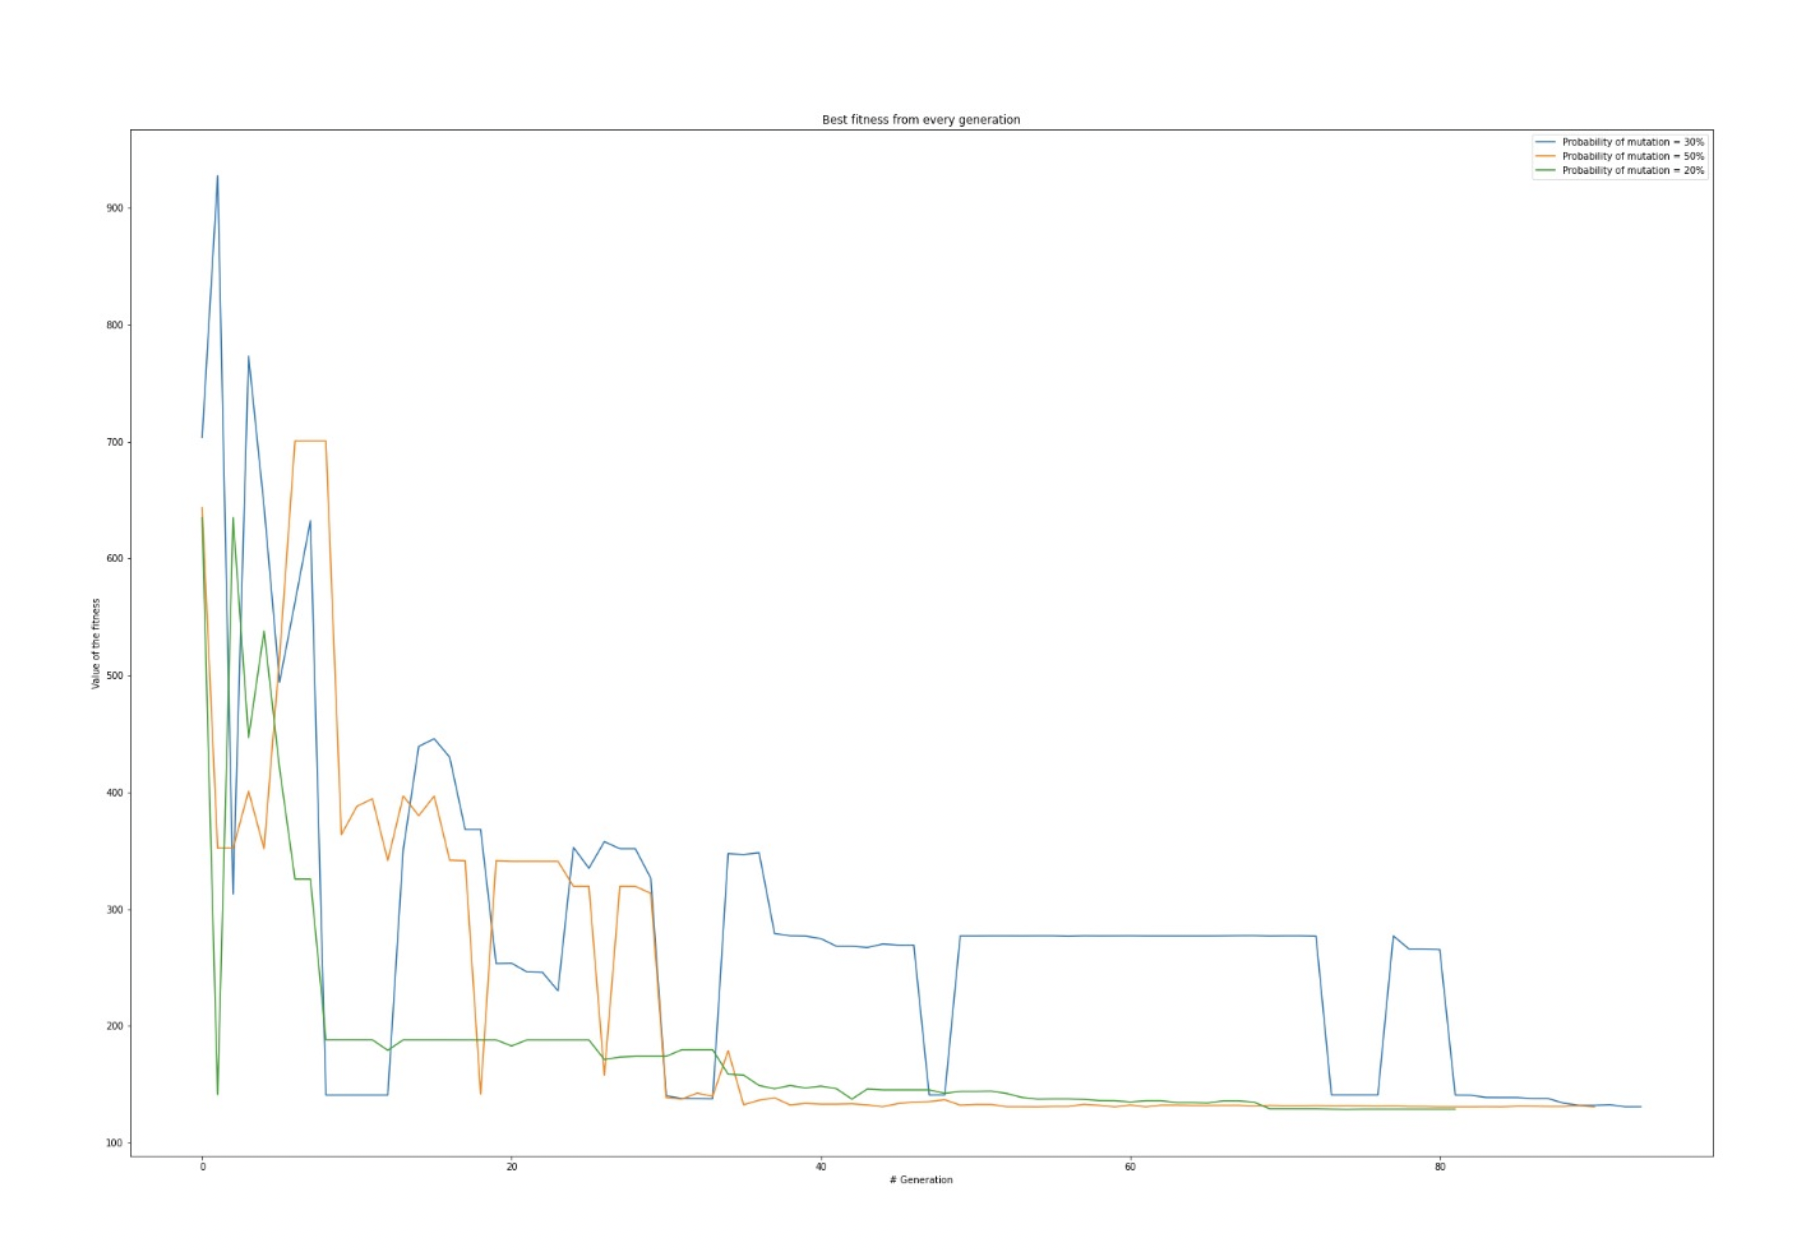

**Figura 2.** Gráfica análisis de la prueba de distintos valores de probabilidad de mutación. Muestra la aleatoriedad que provoca aumentar el porcentaje en la probabilidad de mutación

---


# **Paso 3:** Juego de pruebas, Decisiones de diseño y Conclusiones


---

##### **3.1 Juego de pruebas**

*Nota: Cada una de las pruebas se han ejecutado 3 veces.*

-----

**Primer dataset**

*Prueba num 1:*
 
    Población       30
    Prob Mutación   0.2
    Prob Cruce      0.817
    Torneo          4   individuos
    Generaciones    100

*Resultados:*

    Mejor error ==> gen: 50 , mejor_fitness: 95.03
    Mejor error ==> gen: 30 , mejor_fitness: 73.473
    Mejor error ==> gen: 90 , mejor_fitness: 73.192

    Convergencia ==> Baja convergencia

*Prueba num 2:*
 
    Población       60
    Prob Mutación   0.2
    Prob Cruce      0.82
    Max_Depth       5
    Min_Depth       2
    Torneo          5   individuos
    Generaciones    500

*Resultados:*

    Mejor error ==> gen: 49 , mejor_fitness: 5.618
    Mejor error ==> gen: 61 , mejor fitness: 2.36
    Mejor error ==> gen: 78 , mejor fitness: 1.6

    Convergencia ==> Alta convergencia

*Prueba num 3:*
 
    Población       60
    Prob Mutación   0.1
    Prob Cruce      0.82
    Max_Depth       5
    Min_Depth       2
    Torneo          5   individuos
    Generaciones    100

*Resultados:*

    Mejor error ==> gen: 70 , mejor_fitness: 35.854
    Mejor error ==> gen: 108 , mejor_fitness: 47.28
    Mejor error ==> gen: 78 , mejor_fitness: 83.378

    Convergencia ==> Media convergencia

----------
**Segundo dataset**

*NOTA2: Las pruebas con el dataset extenso se hicieron con los parámetros con mejores resultados obtenidos del primer dataset*

*Hiperparámetros:*

    Población       60
    Prob Mutación   0.2
    Prob Cruce      0.82
    Max_Depth       5
    Min_Depth       2
    Torneo          5   individuos
    Generaciones    500

*Resultados:*

    Mejor error ==> gen: 170 , mejor_fitness: 25.718
    Mejor error ==> gen: 139 , mejor_fitness: 32.849 
    Mejor error ==> gen: 197 , mejor_fitness: 21.883

    Convergencia ==> Alta convergencia

----

##### **3.1 Resultado del mejor árbol**

<img src="bestTree.png">

*Nota: El árbol presenta una ecuación que podría simplificarse a una menor.*


### **3.2 Decisiones de diseño y Conclusiones**

#### **3.2.1 Decisiones de diseño:**

Para aproximarnos a la función, principalmente quisimos ver la tendencia de la curva según los datos dados. 

Para ello, se hizo uso de diferentes librerias de python con las que plotear los datos de distintas formas (véase PASO 1 del notebook). Dada la tendencia que se obtenia de las distintas gráficas, principalmente se pensó en funciones lineales, por lo que se hizo una primera versión del código basándonos en algoritmos genéticos que implementaba la ecuación de la recta **y=mx+b**.

En esta primera versión del código se buscaron los valores de las incógnitas de la ecuación que después se implementarían para saber si exactamente era la ecuación buscada.

Gracias a la implementación se vió que la ecuación no era de la de la recta, aunque la tendencia fuera bastante parecida.

El siguiente paso realizado, fué intentar ver de manera interactiva que ecuación podria ser. Para ello se procedió a usar **Desmos** (https://www.desmos.com) un portal donde, dado un conjunto de datos, puedes aproximar la ecuación de las que se sacan los datos.

Los resultados fueron los siguientes:

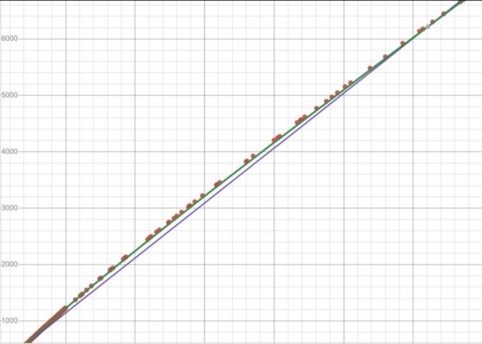

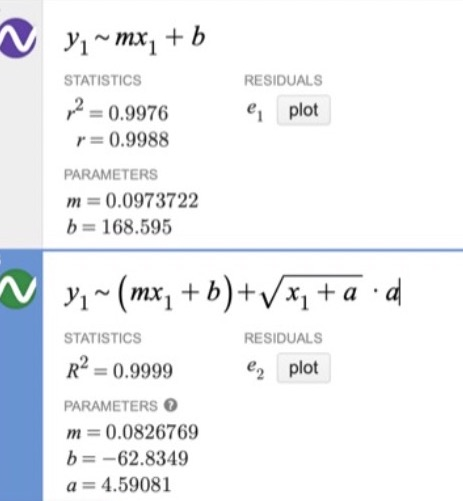

Como se observa en la imagen anterior, la ecuación de la recta según los datos obtuvo una precisión del **97%**, que aunque este no fuera del **100%** se aproximaba bastante a una buena solución para el problema. Seguido de esto, observando que la tendencia de los datos podría venir dado por una aproximación de la función de una raíz, se realizó otra prueba haciendo uso de la ecuación de la recta junto con la implementación de una raíz.

El resultado fue bastante acertado puesto que se obtuvo una precisión del **99%**, lo que permitió encontrar una solucion óptima para la ecuación buscada.

Después de todo este estudio previo realizado sobre la visualización de las gráficas y ecuaciones, se procedió a centrar el estudio en la busqueda de operadores para poder encontrar la función deseada. En esta se incluyó multiplicación, división, suma, resta, logaritmo y raiz, y por otro laod, se descartó el módulo de los datos.

Como se mencinó anteriormente, la presente práctica se centró en la implementación de un Algoritmo Genético para la búsqueda de la función lineal. Pero, se observó que el uso de estos algoritmos, no permiten encontrar ecuaciones tan complejas como la que requiere la solución de los presuntos datos. Por ello es que se procedió a basarse en la Programación Genética, técnica derivada de los proncipios de los Algoritmos Genéticos.

Dicha técnica implementa árboles cuyos nodos son funciones y las hojas operandos. Para poder llevarlo a acabo, se observó la necesidad de inicializar en el modelo dos arrays que contenian: los Operandos (suma, resta, etc) y los Terminales (constantes) de cada árbol.

El conjunto de operadores fue el siguiente:

    FUNCION = [add, sub, mul, div, log, sqt] 
Mientras que los terminales escogidos fue el conjunto de datos de 1 a 9:

    TERMINAL = ['x',1,2,3,4,5,6,7,8,9]
Al igual que los algoritmos genéticos, estas técnicas necesitan la implementación de funciones que deriven de las Leyes de la vida natural de Darwin. Por lo que se procedió a la implementación de: Población inicial, Mutación, Crossover, Selección y Reproducción modificadas para la generación de árboles. Para ello, se hizo una clase perteneciente a la generación de los árboles para hacer el código más interpretable.

Existen varios puntos importantes en el momento de generar una población de individuos (árbol). Como bien se sabe, existen dos tipos: El método grow y full.

La literatura sobre los métodos dicen lo siguiente:

**[*MÉTODO GROW*]**

Sea T el conjunto de terminales y F el conjunto de funciones.

Se elige aleatoriamente un elemento de F para que conforme la raíz del árbol.

El contenido de los nodos hijos de la raíz se elige desde F ∪ T. Si el valor elegido es una función, se repite este procedimiento con los hijos. (si el valor elegido es una constante, se termina esa rama del árbol.)

**[*MÉTODO FULL*]**

El método full hace crecer el árbol en forma similar al método grow, pero siempre se eligen elementos del conjunto de funciones, a menos que el nodo esté a profundidad máxima, en cuyo caso sólo se eligen elementos de T.

El resultado de este método son siempre árboles balanceados de profundidad máxima.

Si se usa el número de nodos como límite de tamaño, el crecimiento se termina cuando el tamaño árbol ha alcanzado el límite.

Notese que en la función 'poblacion' se implementó ambas funciones para poder obtener las cualidades de ambos métodos: Establecer un limite de crecimiento (que conseguimos con el método full) mientras se generan árboles que siempre serán válidos (que conseguimos con el método grow).

Se llegó a la conclusión de se debería de implementar ambas metodología puesto que se observaron varios inconvenientes: La generación de árboles inválidos, los cuales no dejaban avanzar en la búsqueda y, finalmente, el crecimiento de los árboles que, si esto no se controla se podría llegar a obtener árboles con una profundidad muy grande.

Otro punto a comentar sobre el algoritmo es el uso de la recursividad en las funciones. Con esto, se consigue resolver problemas que de manera estática serían mucho más complejo, como por ejemplo, la inicialización de la población de los árboles en la que, sin la recursividad de la función, sería un código sucio y poco entendible, además de más complejo.

Una vez se implementaron cada una de las funciones comentadas (PASO 2) se procedió a realizar el juego de pruebas.

#### **3.2.2 Conclusiones**

Esta práctica tenía como objetivo encontrar una función desconocida que stisfaciera la relacion que se encuentran entre las variable **X** e **Y** en el conjunto de datos proporcionado llamado "*unkown_function.csv*" y "*unknown_function_long2*". Despues de analizar e implementar varias metodologías y principios de la computación evolutiva se consiguió ejecutar la programación genética debido a la complejidad de la función deseada.

Con ello, se obtuvo un árbol que consigió converger a una fitness, es decir, error medio de 1.6. A pesar de que estos no han llegado a conseguir un error medio de 0, los resultados obtenidos en ambos conjuntos de datos han resultado ser óptimos para la aproximación de la función buscada.
     
En cuanto al funcionamiento del algoritmo se observa que el rendimiento adecuado de esre depende directamente de los valores escogidos para los hiperparámetros. Esto puede deberse debido a que se habrán encontrado parametros que se adaptan bien al modelo que le permite descubrir por su cuenta cuales son los detalles necesarios para adaptarse a una solución para el problema. Por otro lado, también pudo haber ocurrido que el algoritmo se haya adaptado bien a parámetros iniciales, lo que no permite programe de manera generativa. 

Además de una posible dependencia de hiperparámetros, también se comprobó el funcionamiento del algoritmo haciendo uso de ambos datasets. Con el primero conjunto de datos, se consiguió un valor de la fitness menor debido a que los primeros datos eran *Integers* que usan 32 bits mientras que el segundo conjunto de datos hace uso de componentes *Longs* que usa 64 bits para codificarlos. 

Por ello es que el rango de valores de *Integers* sería: [**-32768 a 32767**], mientras que el rango de valores de *Longs* sería: [**-2147483648 a 2147483647**]

Esta es la razón por la cual es mucho más difícil converger hasta los mínimos locales o globales que obtiene el primer conjunto de datos en el segundo datast con datos *Longs*. Por lo que indica que, los valores dados por este segundo conjunto de datos, aunque tenga valores de fitness mayores, estos si han convergido correctamente proveyendo resultados correctos.

Además cabe destacar que el desarrollo del algoritmo  precisa de una capacidad de computo que ordenadores portatiles carecen, por lo que, encontrar soluciones óptimas en periodos cortos de tiempo es difícil.

Con todo lo comentado anteriormente se puede concluir que se implementó correctamente los principios y definiciones de computacion evolutiva y programación genética para la aplicación de un modelo que prediga una función desconocida. 

Gracias al gran esfuerzo de los integrantes se consiguió implementar un algoritmo que ayudó a consiguir una solución óptima para el problema planteado. Teniendo en cuenta que ninguno había aplicado anteriormente un modelo similar, en general, han sido unos resultados coherentes, pero como la mayoría de los casos, el algoritmo tiene margen de mejora.